In [3]:
# Intalo la libreria Spacy
# WATERMARK -- nos sirve para poder ver con que librerias estamos trabajando en nuestro entorno

!pip install spacy watermark -q

In [4]:
# Modelos -- https://spacy.io/models/es

# Instalo unos de los core - de python traeme el modulo de spacy y descarga el modelo pequeño / mediano / grande

!python -m spacy download es_core_news_md -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import spacy
from spacy import  displacy

# DISPLACY = nos sirve para realizar los graficos de relacion de palabras (para construir las visualizaciones de relaciones como de tipo de etiquetas que son).


# Pipeline SPACY

In [9]:
# Paso N°1 = Cargamos el MODELO

nlp = spacy.load("es_core_news_md") # en la variable NLP (Natural Language Processing) voy a almacenar el core medio, del modulo spacy
import es_core_news_md # importo al espacio de trabajo
nlp = es_core_news_md.load() # almaceno y abro el modulo

In [10]:
# Elijo un texto (en este caso lo saque de https://es.wikipedia.org/wiki/Neurociencia)

texto_ejemplo = "La neurociencia (también en plural, neurociencias) es una disciplina científica que estudia el sistema nervioso y todos sus aspectos: por ejemplo, estructura, función, desarrollo ontogenético y filogenético, bioquímica, farmacología y patología, y cómo sus diferentes elementos interactúan, dando lugar a las bases biológicas de la cognición y la conducta."

In [15]:
# Paso N°2 = Procesar el texto con Spacy

doc = nlp(texto_ejemplo) # Creamos el objeto doc, crea una variable que vamos a poner a funcionar el modelo para convertir en tokens.


In [30]:
# Tokenizacion

tokens = [token.text for token in doc]
print(tokens)

['La', 'neurociencia', '(', 'también', 'en', 'plural', ',', 'neurociencias', ')', 'es', 'una', 'disciplina', 'científica', 'que', 'estudia', 'el', 'sistema', 'nervioso', 'y', 'todos', 'sus', 'aspectos', ':', 'por', 'ejemplo', ',', 'estructura', ',', 'función', ',', 'desarrollo', 'ontogenético', 'y', 'filogenético', ',', 'bioquímica', ',', 'farmacología', 'y', 'patología', ',', 'y', 'cómo', 'sus', 'diferentes', 'elementos', 'interactúan', ',', 'dando', 'lugar', 'a', 'las', 'bases', 'biológicas', 'de', 'la', 'cognición', 'y', 'la', 'conducta', '.']


In [18]:
# Lematizacion: forma base de cada token
for token in doc:
  #Ignoramos puntación y espacios para mayor claridad
  if not token.is_punct and not token.is_space:
    print(f"'{token.text}' -> '{token.lemma_}'")

'La' -> 'el'
'neurociencia' -> 'neurociencia'
'también' -> 'también'
'en' -> 'en'
'plural' -> 'plural'
'neurociencias' -> 'neurociencia'
'es' -> 'ser'
'una' -> 'uno'
'disciplina' -> 'disciplina'
'científica' -> 'científico'
'que' -> 'que'
'estudia' -> 'estudiar'
'el' -> 'el'
'sistema' -> 'sistema'
'nervioso' -> 'nervioso'
'y' -> 'y'
'todos' -> 'todo'
'sus' -> 'su'
'aspectos' -> 'aspecto'
'por' -> 'por'
'ejemplo' -> 'ejemplo'
'estructura' -> 'estructura'
'función' -> 'función'
'desarrollo' -> 'desarrollo'
'ontogenético' -> 'ontogenético'
'y' -> 'y'
'filogenético' -> 'filogenético'
'bioquímica' -> 'bioquímico'
'farmacología' -> 'farmacología'
'y' -> 'y'
'patología' -> 'patología'
'y' -> 'y'
'cómo' -> 'cómo'
'sus' -> 'su'
'diferentes' -> 'diferente'
'elementos' -> 'elemento'
'interactúan' -> 'interactuar'
'dando' -> 'dar'
'lugar' -> 'lugar'
'a' -> 'a'
'las' -> 'el'
'bases' -> 'base'
'biológicas' -> 'biológico'
'de' -> 'de'
'la' -> 'el'
'cognición' -> 'cognición'
'y' -> 'y'
'la' -> 'el'
'c

In [19]:
# Etiquetado gramatical
for token in doc:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' -> {token.pos_} ({spacy.explain(token.pos_)}) -> {token.tag_}")

'La' -> DET (determiner) -> DET
'neurociencia' -> NOUN (noun) -> NOUN
'(' -> PUNCT (punctuation) -> PUNCT
'también' -> ADV (adverb) -> ADV
'en' -> ADP (adposition) -> ADP
'plural' -> NOUN (noun) -> NOUN
',' -> PUNCT (punctuation) -> PUNCT
'neurociencias' -> NOUN (noun) -> NOUN
')' -> PUNCT (punctuation) -> PUNCT
'es' -> AUX (auxiliary) -> AUX
'una' -> DET (determiner) -> DET
'disciplina' -> NOUN (noun) -> NOUN
'científica' -> ADJ (adjective) -> ADJ
'que' -> PRON (pronoun) -> PRON
'estudia' -> VERB (verb) -> VERB
'el' -> DET (determiner) -> DET
'sistema' -> NOUN (noun) -> NOUN
'nervioso' -> ADJ (adjective) -> ADJ
'y' -> CCONJ (coordinating conjunction) -> CCONJ
'todos' -> DET (determiner) -> DET
'sus' -> DET (determiner) -> DET
'aspectos' -> NOUN (noun) -> NOUN
':' -> PUNCT (punctuation) -> PUNCT
'por' -> ADP (adposition) -> ADP
'ejemplo' -> NOUN (noun) -> NOUN
',' -> PUNCT (punctuation) -> PUNCT
'estructura' -> NOUN (noun) -> NOUN
',' -> PUNCT (punctuation) -> PUNCT
'función' -> NOUN (

In [20]:
# Analisis de dependencia sintactica
for token in doc:
     if not token.is_space:
        print(f"'{token.text}' -> {token.dep_} ({spacy.explain(token.dep_)}) -> '{token.head.text}'")

'La' -> det (determiner) -> 'neurociencia'
'neurociencia' -> nsubj (nominal subject) -> 'disciplina'
'(' -> punct (punctuation) -> 'también'
'también' -> advmod (adverbial modifier) -> 'neurociencias'
'en' -> case (case marking) -> 'también'
'plural' -> amod (adjectival modifier) -> 'también'
',' -> punct (punctuation) -> 'también'
'neurociencias' -> appos (appositional modifier) -> 'neurociencia'
')' -> punct (punctuation) -> 'neurociencias'
'es' -> cop (copula) -> 'disciplina'
'una' -> det (determiner) -> 'disciplina'
'disciplina' -> ROOT (root) -> 'disciplina'
'científica' -> amod (adjectival modifier) -> 'disciplina'
'que' -> nsubj (nominal subject) -> 'estudia'
'estudia' -> acl (clausal modifier of noun (adjectival clause)) -> 'disciplina'
'el' -> det (determiner) -> 'sistema'
'sistema' -> obj (object) -> 'estudia'
'nervioso' -> amod (adjectival modifier) -> 'sistema'
'y' -> cc (coordinating conjunction) -> 'aspectos'
'todos' -> det (determiner) -> 'sus'
'sus' -> det (determiner) 

In [22]:
# Mapa de relacion

displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

In [27]:
# Veo las entidades en el texto

if doc.ents:
    print("Entidades encontradas:")
    print("Texto de la Entidad -> Etiqueta (Tipo)")
    for ent in doc.ents:
        print(f"'{ent.text}' -> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("No se encontraron entidades nombradas en este texto.")

No se encontraron entidades nombradas en este texto.


In [28]:
# Visualizo las entidades en el texto

displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

In [31]:
# Conteo de palabras

from collections import Counter

In [32]:
wiki_txt = "La neurociencia (también en plural, neurociencias) es una disciplina científica que estudia el sistema nervioso y todos sus aspectos: por ejemplo, estructura, función, desarrollo ontogenético y filogenético, bioquímica, farmacología y patología, y cómo sus diferentes elementos interactúan, dando lugar a las bases biológicas de la cognición y la conducta."

In [34]:
print(f"'{wiki_txt[:100]}...'") # Muestra un fragmento

'La neurociencia (también en plural, neurociencias) es una disciplina científica que estudia el siste...'


In [35]:
doc = nlp(wiki_txt)
print("¡Texto procesado!")

¡Texto procesado!


In [64]:
# Segmentacion de oraciones

list(doc.sents)

[La neurociencia (también en plural, neurociencias) es una disciplina científica que estudia el sistema nervioso y todos sus aspectos: por ejemplo, estructura, función, desarrollo ontogenético y filogenético, bioquímica, farmacología y patología, y cómo sus diferentes elementos interactúan, dando lugar a las bases biológicas de la cognición y la conducta.]

In [41]:
palabras_clave = [] #Creo una lista vacia, donde voy a ir almacenando las palabras claves

In [46]:
for token in doc:
    if token.is_alpha and not token.is_stop:
      # Normalización: Obtener lema y convertir a minúsculas (lower)
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:15]}") #Elijo la contidad de palabras que quiero extraer

Se extrajeron 78 palabras clave (lemas, sin stop words).
Ejemplo: ['neurociencia', 'plural', 'neurociencia', 'disciplina', 'científico', 'estudiar', 'sistema', 'nervioso', 'aspecto', 'ejemplo', 'estructura', 'función', 'desarrollo', 'ontogenético', 'filogenético']


In [49]:
frecuencia_palabras = Counter(palabras_clave)

In [50]:
N = 15 #el numero puede varias depende lo que necesitemos
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [52]:
#Vemos la frecuencia
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' -> {frecuencia}")

- 'neurociencia' -> 6
- 'plural' -> 3
- 'disciplina' -> 3
- 'científico' -> 3
- 'estudiar' -> 3
- 'sistema' -> 3
- 'nervioso' -> 3
- 'aspecto' -> 3
- 'ejemplo' -> 3
- 'estructura' -> 3
- 'función' -> 3
- 'desarrollo' -> 3
- 'ontogenético' -> 3
- 'filogenético' -> 3
- 'bioquímico' -> 3


# Visualizacion

In [62]:
!pip install wordcloud -q # Intalamos la biblioteca wordcloud
from wordcloud import WordCloud # Importa la clase WordCloud
import matplotlib.pyplot as plt # Importa el módulo pyplot de matplotlib con 'plt' (para graficar)


In [60]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis', # Paleta de colores
    max_words=30,      # Mostrar máximo palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

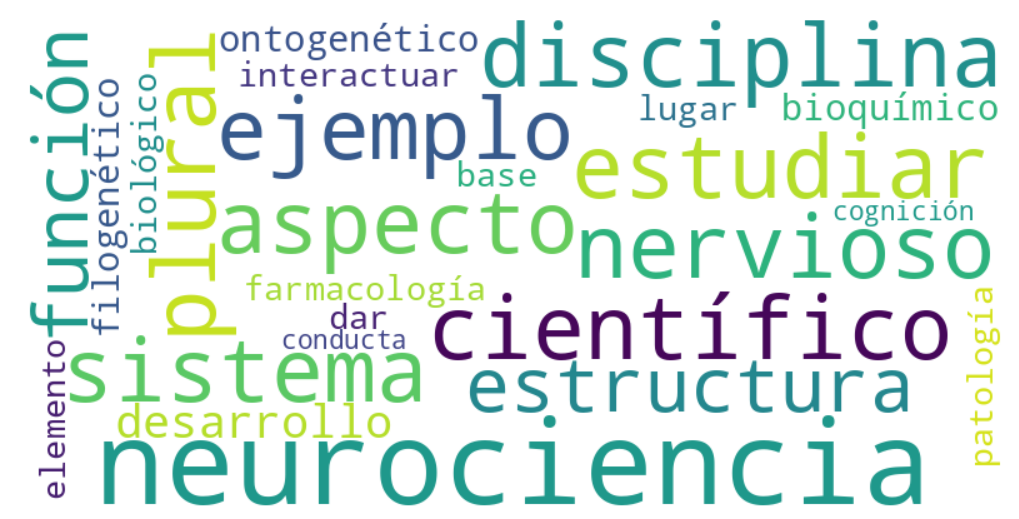

In [73]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!